In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

In [117]:
def gaussian(x, sigma, mu):
    """
    Return a np.array containing a gaussian distribution over x of mean mu and 
    of standard deviation sigma
    """
    g = 1/np.sqrt(2* np.pi * sigma**2) * np.exp( -1/2 * (x-mu)**2 / sigma**2)
    g = g / np.sum(g) # normalisation, count number of people
    return g

In [51]:
def generate_density_map(gt, x, sigma):
    """
    Generate an array representing a 1D density map based on the ground truth value gt, itself
    being an array.
    """

    dm = np.zeros(len(x)) # creates an empty density map
    
    for p in gt:
        dm += gaussian(x, sigma, p)
        
    return dm

1.0


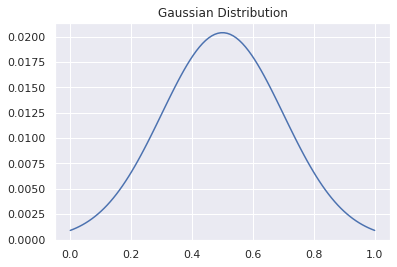

In [116]:
# TEST

x = np.linspace(0, 1, 100)
sigma = 0.2
mu = 0.5

g = gaussian(x, sigma, mu)
plt.plot(x, g)
plt.title("Gaussian Distribution")
plt.show()

In [23]:
def plot_ground_truth(gt):
    """
    Plot ground truth as a distribution of probability of known events,
    i.e. a sum of diracs at the exact positions.
    """
    
    for xc in gt:
        plt.axvline(x=xc, c="green")

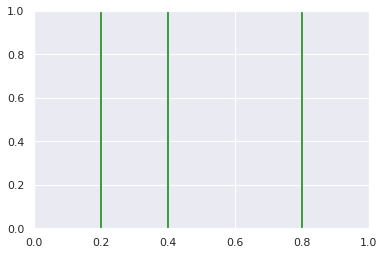

3.0000000000000013


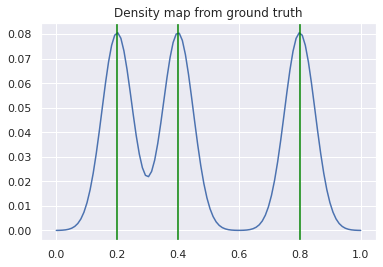

In [120]:
# TEST

x = np.linspace(0, 1, 100)
sigma = 0.05
gt = [0.2, 0.4, 0.8]

plot_ground_truth(gt)
#plt.savefig("gt_4.png")
plt.show()
dm = generate_density_map(gt, x, sigma)

plt.plot(x, dm)
plot_ground_truth(gt)
plt.title("Density map from ground truth")
#plt.savefig("dm_3.png")
plt.show()

# TODO

## Adversary algorithms

- [x] voting method
- [ ] derivative methode (en pause)

## Automate the testing

- [ ] Create a way to automatically check if the ground thruth is acutally equal (or close, using some norm) to the one infered by the adversary
- [ ] Randomly create a great number of density map to evaluate the accurary of the adversary before breaking it for comparaison

## Break them

- [ ] try different heuristics
- [ ] try different distributions
- [ ] Add noise (Gaussian, Diracs...)

In [31]:
def detection_voting(density_map, alpha):
    """
    Using a voting method in a certain range alpha, try to infer the ground truth from the density map.
    """
    
    N = len(density_map)
    vote = np.zeros(N) # creates an empty vote
    
    # Count the votes
    for k in range(N - alpha):
        index = np.argmax(density_map[k:k+alpha])
        vote[index + k] += 1
        
    # Thresholding  
    for k in range(N):
        if vote[k] > alpha/2:
            vote[k] = 1
        else:
            vote[k] = 0
        
    return vote

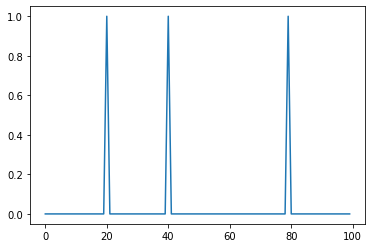

In [34]:
voting_map = detection_voting(dm, 20)
plt.plot(voting_map)
plt.savefig("voting_map_1.png")

In [10]:
def dectection_derivative(density_map):
    """
    Using a method based on derivatives, try to infer the ground truth from the density map.
    """
    
    N = len(density_map)
    derivative = np.zeros(N) # creates an empty array
    
    for k in range(N - 1):
        derivative[k] = 1/2 * ( density_map[k+1] - density_map[k] )
    
    return derivative

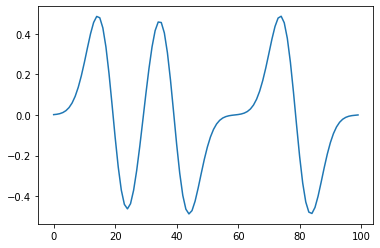

In [11]:
derivative_map = dectection_derivative(dm)
plt.plot(derivative_map)

La méthode par dérivé risque de donner beaucoup de faux positif. En attendant de trouver une solution à ce problème, concentrons nous sur la première méthode (par vote)

# Automatisation des test

In [2]:
def random_ground_truth():
    """
    Create between 1 and 5 person and distribute them randomly into [0,1]
    """
    N = np.random.randint(1, 6)
    return np.random.rand(N)

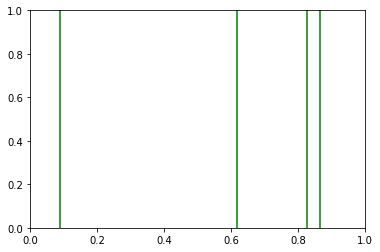

In [18]:
plot_ground_truth(random_ground_truth())
#plt.savefig("gt_3.png")

In [15]:
vm = transform_voting_map(voting_map, x)

diff = np.linalg.norm(np.array(vm) - np.array(gt))

print(diff)

NameError: name 'transform_voting_map' is not defined

## Average error of the algorithm before noise

In [36]:
alphas = np.linspace(5, 80, 16, dtype=int)
means = []

for alpha in alphas:

    N = 10000
    x = np.linspace(0, 1, 100)
    sigma = 0.05


    norms = []

    for k in range(N):

        ground_truth = random_ground_truth()                  # generate ground truth
        density_map = generate_density_map(ground_truth, x, sigma)  # generate density map
        voting_map = detection_voting(density_map, alpha)              # generate voting map
        # tvm = transform_voting_map(voting_map, x)

        
        # Ce choix de norme est assez arbitraire et va définir un certains norme de résultats par la suite
        # Il pourrait etre sage de tester d'autre choix ou de chercher plus longtemps la bonne manière de comparer la norme de deux vecteurs de taille variables
        
        # On ne peut pas non plus utiliser le MAE (enfin on pourrait pour le cas else) car on s'interesse fortement à la position et non pas uniquement au compte final
        # On pourrait peut etre faire une courbe du MAE en fonction de l'échelle comme on avait vu durant le premier RDV, mais ça devient assez difficile à comparer
        
        # Voir PMAE (Patch Mean Absolute Error), cf PaDNet sur ArXiV.
        
        # faire sur les espaces
        
        # if len(tvm) == len(ground_truth):
        #     norm = np.linalg.norm(np.array(tvm) - np.array(ground_truth))
        # else:
        #     norm = abs(len(tvm) - len(ground_truth)) # really high norm if size don't correspond
    
        egt = compact_to_extended(ground_truth, x) # norm in the extended space
    
        norm = np.linalg.norm(egt - voting_map)
        norms.append(norm)
        
    means.append(np.mean(norms))

NameError: name 'compact_to_extended' is not defined

In [24]:
voting_map

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
means

[1.0949026043188026,
 1.1434535191922435,
 1.178171267183192,
 1.220371377706634,
 1.2809097715909674,
 1.345794861971318,
 1.3714887613794806,
 1.455989157924088,
 1.482032777312779,
 1.5204771296839017,
 1.5537455379617184,
 1.5749121212248158,
 1.5901635003712764,
 1.6652658022453988,
 1.6575103970472111,
 1.6673429615857451]

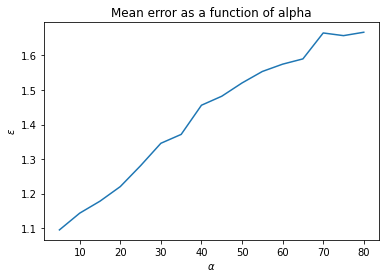

In [38]:
means = [1.0949026043188026,
 1.1434535191922435,
 1.178171267183192,
 1.220371377706634,
 1.2809097715909674,
 1.345794861971318,
 1.3714887613794806,
 1.455989157924088,
 1.482032777312779,
 1.5204771296839017,
 1.5537455379617184,
 1.5749121212248158,
 1.5901635003712764,
 1.6652658022453988,
 1.6575103970472111,
 1.6673429615857451]
plt.plot(alphas, means)
plt.title("Mean error as a function of alpha")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\varepsilon$")
plt.savefig("1d_error_1.png")

## Average error of the algorithm with Dirac noise

First, define Dirac noise

In [40]:
def find_nearest(array, value):
    """
    Finds nearest index in a nparray
    """
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def dirac_noise(x, density_map, lower=3, upper=10):
    """
    Generate a Dirac noise of the same size as x and with a number of Diracs between the lower and upper values.
    Adds it to the existing density map, making sure no value is higher than one, then returns the new density map
    with added noise.
    
    The density map must be normalised.
    """
    
    noisy_density_map = density_map.copy()
    
    N = np.random.randint(lower, upper)
    diracs = np.random.rand(N)
    
    for d in diracs:
        idx = find_nearest(x, d)
        noisy_density_map[idx] = 1
    
    return noisy_density_map

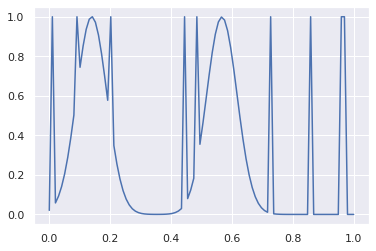

In [124]:
# Visualisation of the density map with added Dirac noise

ground_truth = random_ground_truth()  # generate ground truth
density_map = generate_density_map(ground_truth, x, sigma)  # generate density map
density_map = density_map / max(density_map)  # normalisation
noise = dirac_noise(x, density_map) # generate noisy dm

plt.plot(x, noise)
plt.savefig("1d_dirac_noise.png")

In [46]:
alphas = np.linspace(5, 95, 19, dtype=int)

means = []

for alpha in alphas:

    N = 10000
    x = np.linspace(0, 1, 100)
    sigma = 0.05


    norms = []

    for k in range(N):

        ground_truth = random_ground_truth()  # generate ground truth
        density_map = generate_density_map(ground_truth, x, sigma)  # generate density map
        density_map = density_map / max(density_map)  # normalisation
        noisy_map = dirac_noise(x, density_map) # generate noisy dm
        voting_map = detection_voting(noisy_map, alpha)  # generate voting map
        
        egt = compact_to_extended(ground_truth, x) # norm in the extended space
    
        norm = np.linalg.norm(egt - voting_map)
        norms.append(norm)
        
    means.append(np.mean(norms))

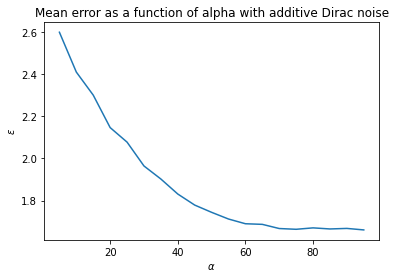

In [47]:
plt.plot(alphas, means)
plt.title("Mean error as a function of alpha with additive Dirac noise")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\varepsilon$")
plt.savefig("1d_dirac_mae.png")


## Average error of the algorithm with Gaussian noise


## Average error of the algorithm with random swaps

The goal here is to maintain the local weight (integral) to not mess up the density but still fool the detection algorithm

In [45]:
def compact_to_extended(vector, space):
    """
    Take a vector from the compact space and transforms it into the corresponding vector in the extended space.
    
    Example:
    input: [0.2, 0.8]
    output: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..., 0, 1, 0, ..., 0]
    """
    
    extended_vector = np.zeros(len(space))
    
    for k in vector:
        idx = find_nearest(k, space)
        extended_vector[idx] = 1
    
    return extended_vector


def extended_to_compact(vector, space):
    """
    Take a vector from the extended space and transforms it into the corresponding vector in the compact space.
    """
    
    return [space[i] for i in range(len(vector)) if vector[i]]

## Calculate MAE and PMAE

$$\text{MAE} = \frac{1}{M} \sum_{i=1}^M |g_i - \hat g_i|$$

$$\text{PMAE} = \frac{1}{n\times M} \sum_{i=1}^{n\times M} |g_i - \hat g_i|$$

Also Multi-scale MAE

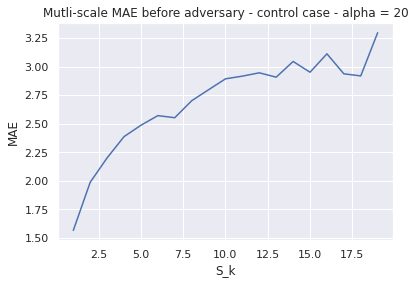

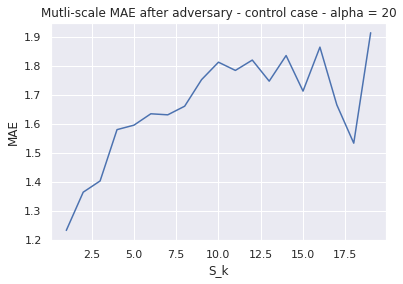

In [132]:
# Multi-scale MAE Control case

scales = np.arange(1,20)
alpha = 20
N = 1000 # 10 000 does not smoth the curve
x = np.linspace(0, 1, 100)
sigma = 0.05
means_before = []
means_after = []

for scale in scales:
    
    norms_before = []
    norms_after = []
    
    for k in range(N):

        ground_truth = random_ground_truth()                  # generate ground truth
        density_map = generate_density_map(ground_truth, x, sigma)  # generate density map
        egt = compact_to_extended(ground_truth, x) # norm in the extended space
        
        # MS_MAE before
        norm_before = 0
        
        for i in range(scale):
            factor = int(len(x)/scale)
            norm_before += np.linalg.norm(egt[i*factor:(i+1)*factor] - density_map[i*factor:(i+1)*factor])
        norms_before.append(norm_before)
        
        # post-processing
        # none here, control case
        
        
        # adversary
        voting_map = detection_voting(density_map, alpha)  # generate voting map

        # MS_MAE after
        norm_after = 0
        
        for i in range(scale):
            factor = int(len(x)/scale)
            norm_after += np.linalg.norm(egt[i*factor:(i+1)*factor] - voting_map[i*factor:(i+1)*factor])
            
        
        norms_after.append(norm_after)
    means_before.append(np.mean(norms_before))
    means_after.append(np.mean(norms_after))

plt.figure(1)
plt.plot(scales, means_before)
plt.xlabel("S_k")
plt.ylabel("MAE")
plt.title(f"Mutli-scale MAE before adversary - control case - alpha = {alpha}")


plt.figure(2)
plt.plot(scales, means_after)
plt.xlabel("S_k")
plt.ylabel("MAE")
plt.title(f"Mutli-scale MAE after adversary - control case - alpha = {alpha}")

means_before_control = means_before
means_after_control = means_after

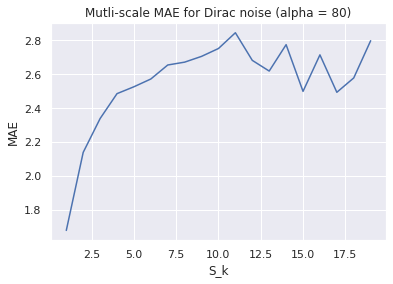

In [108]:
# Multi-scale MAE Dirac noise

#scales = [1,2,3,4,5,10,20]
scales = np.arange(1,20)
alpha = 20
N = 1000
x = np.linspace(0, 1, 100)
sigma = 0.05
means = []

for scale in scales:
    norms = []
    for k in range(N):

        ground_truth = random_ground_truth()                  # generate ground truth
        density_map = generate_density_map(ground_truth, x, sigma)  # generate density map

        # post-processing
        noisy_map = dirac_noise(x, density_map) # generate noisy dm
        
        # adversary
        voting_map = detection_voting(noisy_map, alpha)              # generate voting map

        egt = compact_to_extended(ground_truth, x) # norm in the extended space

        norm = 0
        
        for i in range(scale):
            factor = int(len(x)/scale)
            norm += np.linalg.norm(egt[i*factor:(i+1)*factor] - voting_map[i*factor:(i+1)*factor])
            
        norms.append(norm)
    means.append(np.mean(norms))

plt.plot(scales, means)
plt.xlabel("S_k")
plt.ylabel("MAE")
plt.title(f"Mutli-scale MAE for Dirac noise (alpha = {alpha})")
plt.savefig(f"MS_MAE_Dirac_alpha_{alpha}.png")
plt.show()

In [103]:
# Multi-scale MAE Dirac noise

#scales = [1,2,3,4,5,10,20]
scales = np.arange(1,20)
alpha = 20
N = 1000
x = np.linspace(0, 1, 100)
sigma = 0.05
means = []

for scale in scales:
    norms = []
    for k in range(N):

        ground_truth = random_ground_truth()                  # generate ground truth
        density_map = generate_density_map(ground_truth, x, sigma)  # generate density map

        # post-processing
        noisy_map = dirac_noise(x, density_map) # generate noisy dm
        
        # adversary
        voting_map = detection_voting(noisy_map, alpha)              # generate voting map

        egt = compact_to_extended(ground_truth, x) # norm in the extended space

        norm = 0
        
        for i in range(scale):
            factor = int(len(x)/scale)
            norm += np.linalg.norm(egt[i*factor:(i+1)*factor] - voting_map[i*factor:(i+1)*factor])
            
        norms.append(norm)
    means.append(np.mean(norms))

plt.plot(scales, means)
plt.xlabel("S_k")
plt.ylabel("MAE")
plt.title(f"Mutli-scale MAE for Dirac noise (alpha = {alpha})")
plt.savefig(f"MS_MAE_Dirac_alpha_{alpha}.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [109]:
density_map

array([1.13492282e-06, 3.45755103e-06, 1.01122168e-05, 2.83922394e-05,
       7.65294210e-05, 1.98030786e-04, 4.91940407e-04, 1.17318847e-03,
       2.68595405e-03, 5.90343620e-03, 1.24562316e-02, 2.52315526e-02,
       4.90655623e-02, 9.15978098e-02, 1.64160589e-01, 2.82441309e-01,
       4.66512231e-01, 7.39730212e-01, 1.12605391e+00, 1.64558572e+00,
       2.30864598e+00, 3.10935046e+00, 4.02029122e+00, 4.99023335e+00,
       5.94647638e+00, 6.80258608e+00, 7.47074473e+00, 7.87642698e+00,
       7.97205173e+00, 7.74616010e+00, 7.22567348e+00, 6.47061707e+00,
       5.56273754e+00, 4.59099630e+00, 3.63748172e+00, 2.76675179e+00,
       2.02029637e+00, 1.41623548e+00, 9.53084395e-01, 6.15747634e-01,
       3.81899991e-01, 2.27390359e-01, 1.29978030e-01, 7.13252587e-02,
       3.75744182e-02, 1.90027597e-02, 9.22606675e-03, 4.30023324e-03,
       1.92416776e-03, 8.26550435e-04, 3.40856270e-04, 1.34942490e-04,
       5.12863337e-05, 1.87124258e-05, 6.55441648e-06, 2.20400958e-06,
      

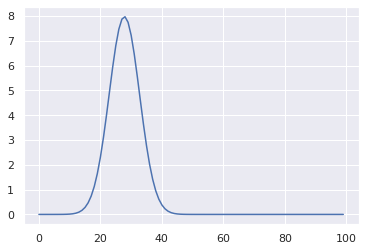

In [111]:
plt.plot(density_map)

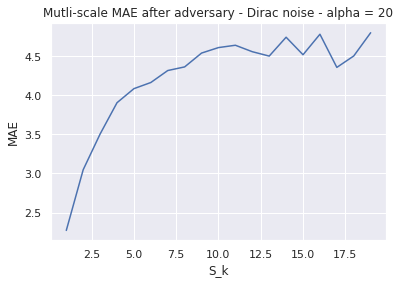

In [131]:
# Multi-scale MAE Dirac Noise

scales = np.arange(1,20)
alpha = 20
N = 1000 # 10 000 does not smoth the curve
x = np.linspace(0, 1, 100)
sigma = 0.05
means_before = []
means_after = []

for scale in scales:
    
    norms_before = []
    norms_after = []
    
    for k in range(N):

        ground_truth = random_ground_truth()                  # generate ground truth
        density_map = generate_density_map(ground_truth, x, sigma)  # generate density map
        egt = compact_to_extended(ground_truth, x) # norm in the extended space
        
        # post-processing
        noisy_map = dirac_noise(x, density_map) # generate noisy dm
        
        # adversary
        voting_map = detection_voting(noisy_map, alpha)  # generate voting map

        # MS_MAE after
        norm_after = 0
        
        for i in range(scale):
            factor = int(len(x)/scale)
            norm_after += np.linalg.norm(egt[i*factor:(i+1)*factor] - voting_map[i*factor:(i+1)*factor])
            
        
        norms_after.append(norm_after)
    means_after.append(np.mean(norms_after))


plt.figure(2)
plt.plot(scales, means_after)
plt.xlabel("S_k")
plt.ylabel("MAE")
plt.title(f"Mutli-scale MAE after adversary - Dirac noise - alpha = {alpha}")

means_after_dirac = means_after

Text(0.5, 1.0, 'Mutliscale MAE after Adversary - alpha = 20')

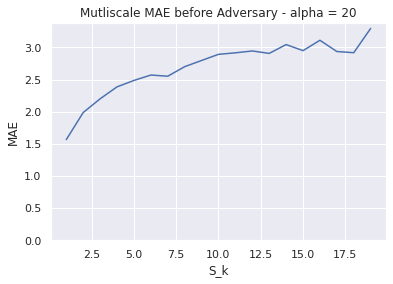

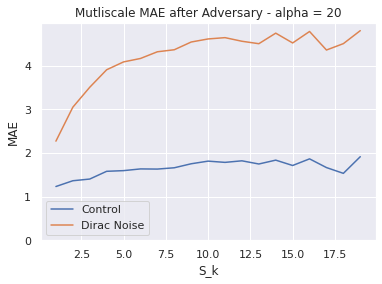

In [137]:
plt.figure(1)
plt.plot(scales, means_before_control)
plt.xlabel("S_k")
plt.ylabel("MAE")
plt.ylim(0)
plt.title(f"Mutliscale MAE before Adversary - alpha = {alpha}")

plt.figure(2)
plt.plot(scales, means_after_control, label="Control")
plt.plot(scales, means_after_dirac, label="Dirac Noise")
plt.xlabel("S_k")
plt.ylabel("MAE")
plt.ylim(0)
plt.legend()
plt.title(f"Mutliscale MAE after Adversary - alpha = {alpha}")